In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
import matplotlib as mpl
%matplotlib notebook
plt.rcParams['svg.fonttype'] = 'none'

datadirec = '/Volumes/lab-goehringn/home/users/blandt/ModelData/advection_v2/'

In [2]:
# Param boundaries
p1_boundaries = (-3, -2, -1, 0, 1)  # log D
p2_boundaries = (-4, -3, -2, -1, 0)  # log koff and kon
nsims = 10

# All parameter combinations
p1_vals = np.linspace(p1_boundaries[0], p1_boundaries[-1], nsims * (len(p1_boundaries) - 1) + 1)
p2_vals = np.linspace(p2_boundaries[0], p2_boundaries[-1], nsims * (len(p2_boundaries) - 1) + 1)
X, Y = np.meshgrid(p1_vals, p2_vals)

# Split parameter ranges
param_range_groups = []
for i in range(len(p1_boundaries) - 1):
    for j in range(len(p2_boundaries) - 1):
        p1_range = [p1_boundaries[i], p1_boundaries[i + 1]]
        p2_range = [p2_boundaries[j], p2_boundaries[j + 1]]
        param_range_groups.append([p1_range, p2_range])
len_param_range_groups = len(param_range_groups)

In [3]:
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

def func(n_start, log=False, vmin=None, vmax=None, label='', title='_', clevels=None, clevel_fmt='%1.1f'):
    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 2.5)
    
    # Compile results
    res_total = np.zeros([(len(p1_boundaries) - 1) * nsims + 1, (len(p2_boundaries) - 1) * nsims + 1])
    count = n_start
    for i in range(len(p1_boundaries) - 1):
        for j in range(len(p2_boundaries) - 1):
            res = np.loadtxt(datadirec + str(count) + '/Res.txt')    
            res_total[i * nsims: (i + 1) * nsims + 1, j * nsims: (j + 1) * nsims + 1] = res
            count += 1
            
    # Log transform
    if log:
        res_total = np.log10(res_total)
        
    # Plot
    im = ax.imshow(res_total.T, extent=[p1_boundaries[0], p1_boundaries[-1], p2_boundaries[0], p2_boundaries[-1]], 
              origin='lower', vmin=vmin, vmax=vmax)
    ax.set_yticks(p2_boundaries)
    ax.set_xticks(p1_boundaries)
    ax.xaxis.set_major_formatter(fake_log)
    ax.yaxis.set_major_formatter(fake_log)  
    ax.set_xlabel(r'$D$')
    ax.set_ylabel(r'$k_{off}$') 
    ax.tick_params(axis='both', labelsize=8)
    
    # Minor ticks
    minor_x_ticks = np.array([])
    for i in range(len(p1_boundaries) - 1):
        a = np.log10(np.linspace(10 ** p1_boundaries[i], 10 ** p1_boundaries[i + 1], 10))
        minor_x_ticks = np.append(minor_x_ticks, a)    
    ax.set_xticks(minor_x_ticks, minor=True)
    minor_y_ticks = np.array([])
    for i in range(len(p2_boundaries) - 1):
        a = np.log10(np.linspace(10 ** p2_boundaries[i], 10 ** p2_boundaries[i + 1], 10))
        minor_y_ticks = np.append(minor_y_ticks, a)    
    ax.set_yticks(minor_y_ticks, minor=True)
    
    # Contours
    contours = ax.contour(X, Y, res_total.T, colors='white', levels=clevels)
    ax.clabel(contours, inline=True, fontsize=6, fmt=clevel_fmt)

    # Colorbar
    cbar = fig.colorbar(im)
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.set_ylabel(label)
    if log:
        cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        cbar.ax.yaxis.set_major_formatter(fake_log)
        
        # Minor ticks
        vrange = ax.get_images()[0].get_clim()
        vrange_int = [np.floor(vrange[0]), np.ceil(vrange[1])]
        c_bounds = np.arange(vrange_int[0], vrange_int[1] + 1)
        minor_c_ticks = np.array([])
        for i in range(len(c_bounds) - 1):
            a = np.log10(np.linspace(10 ** c_bounds[i], 10 ** c_bounds[i + 1], 10))
            minor_c_ticks = np.append(minor_c_ticks, a)
        minor_c_ticks = minor_c_ticks[(minor_c_ticks > vrange[0]) * (minor_c_ticks < vrange[1])]
        cbar.ax.yaxis.set_ticks(minor_c_ticks, minor=True)
 
    # Finalise
    fig.tight_layout()
    fig.savefig('Figs/' + title + '.png', dpi=600, transparent=True)
    fig.savefig('Figs/' + title + '.svg', dpi=600, transparent=True)

### ASI after flow 500s

<IPython.core.display.Javascript object>


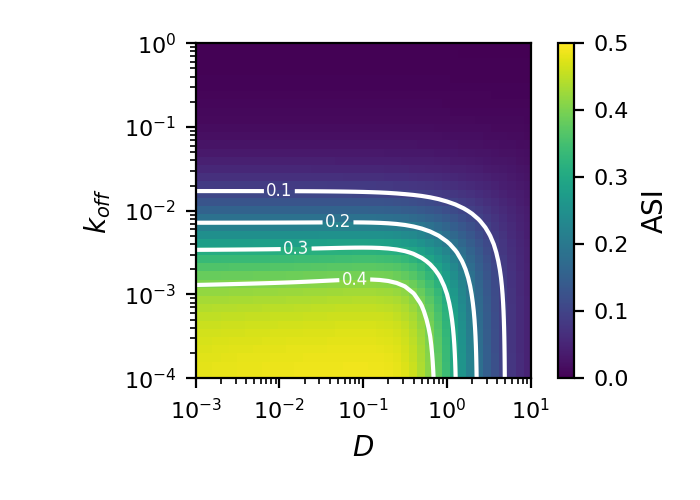

In [10]:
func(0, log=False, vmin=0, vmax=0.5, label='ASI', title='asi_500', clevels=[0.1, 0.2, 0.3, 0.4, 0.5])

### ASI after flow 1000s

<IPython.core.display.Javascript object>


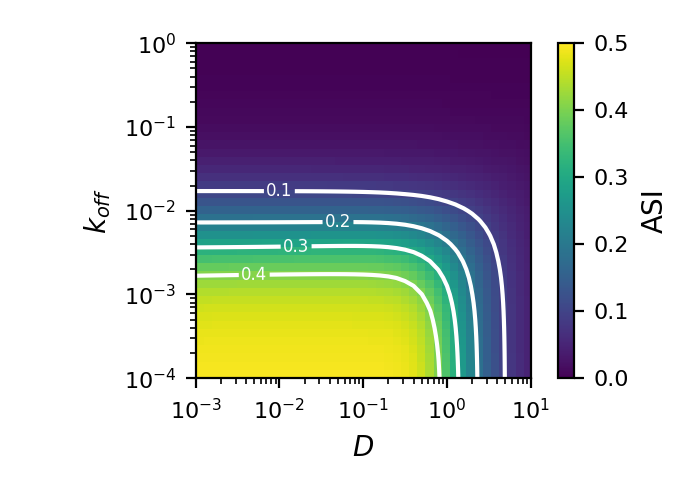

In [11]:
func(1 * len_param_range_groups, log=False, vmin=0, vmax=0.5, label='ASI', title='asi_1000', 
     clevels=[0.1, 0.2, 0.3, 0.4, 0.5])

### Timescale to decrease ASI by half after 1000s flow

<IPython.core.display.Javascript object>


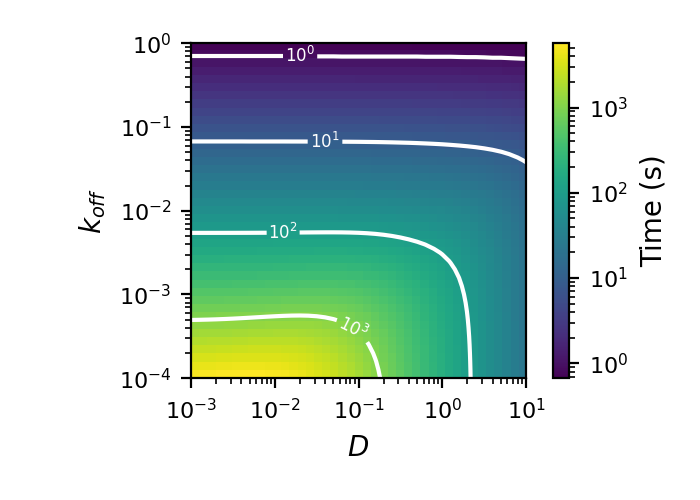

In [12]:
func(2 * len_param_range_groups, log=True, label='Time (s)', title='asi_recovery',
    clevels=[0, 1, 2, 3], clevel_fmt=r'$10^{%d}$')

### Relative depletion of posterior cortex after 500s

<IPython.core.display.Javascript object>


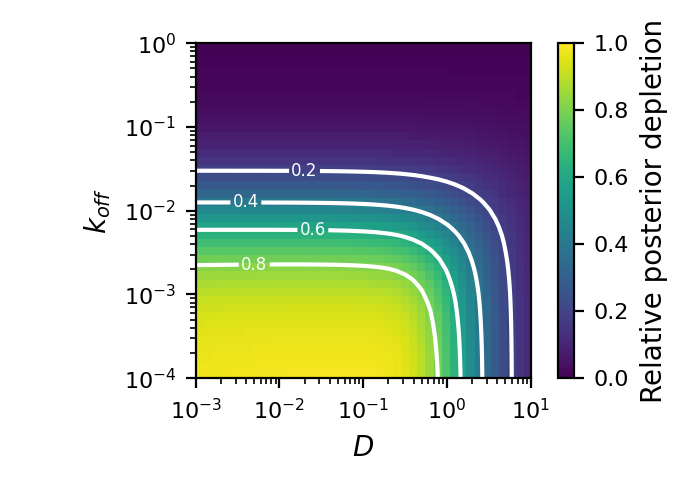

In [13]:
func(3 * len_param_range_groups, log=False, vmin=0, vmax=1, label='Relative posterior depletion', title='pd_500',
    clevels=[0.2, 0.4, 0.6, 0.8])

### Relative depletion of posterior cortex after 1000s

<IPython.core.display.Javascript object>


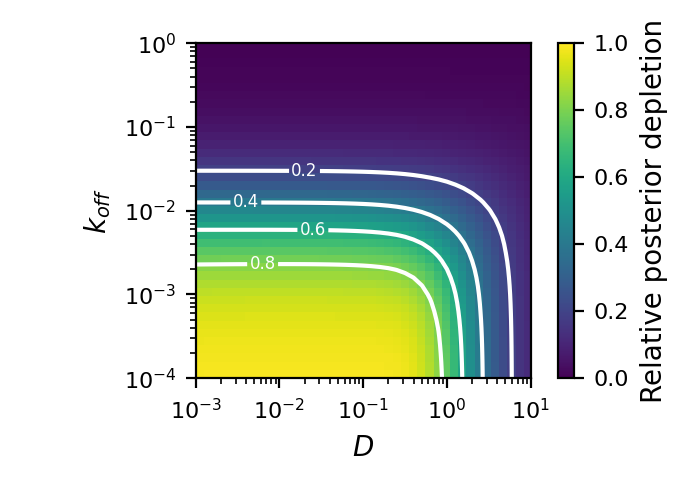

In [14]:
func(4 * len_param_range_groups, log=False, vmin=0, vmax=1, label='Relative posterior depletion', title='pd_1000',
    clevels=[0.2, 0.4, 0.6, 0.8])

### Timescale to decrease relative depletion of posterior by half after 1000s with flow

<IPython.core.display.Javascript object>


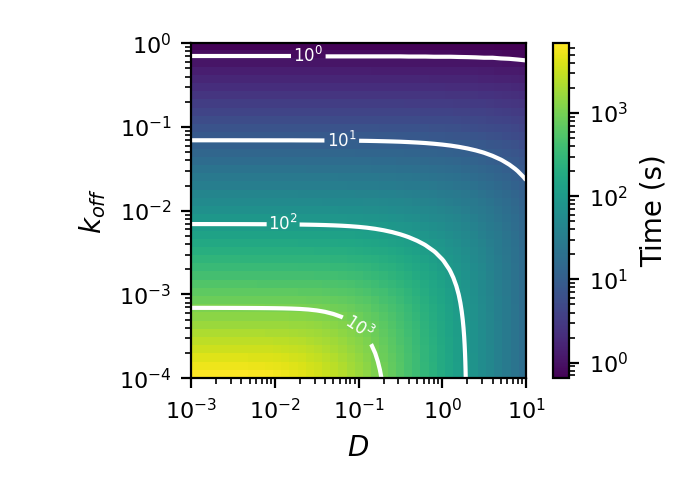

In [15]:
func(5 * len_param_range_groups, log=True, label='Time (s)', title='pd_recovery',
    clevels=[0, 1, 2, 3], clevel_fmt=r'$10^{%d}$')